# Data Analysis on Covid-19 Geospatial Dataset with Python

Let's import the necessary libraries for this project.

In [1]:
from datetime import datetime
import pandas as pd # for reading the data
import numpy as np # for data manipulation
import geopandas as gpd # for dealing with geospatial data
import contextily as ctx # gives us the abilty to have a basemap for the geopandas plot
import matplotlib.pyplot as plt # for data visualization

## Reading Data

Now, let's proceed to reading the data. 
Our data can be found in https://data.humdata.org/.
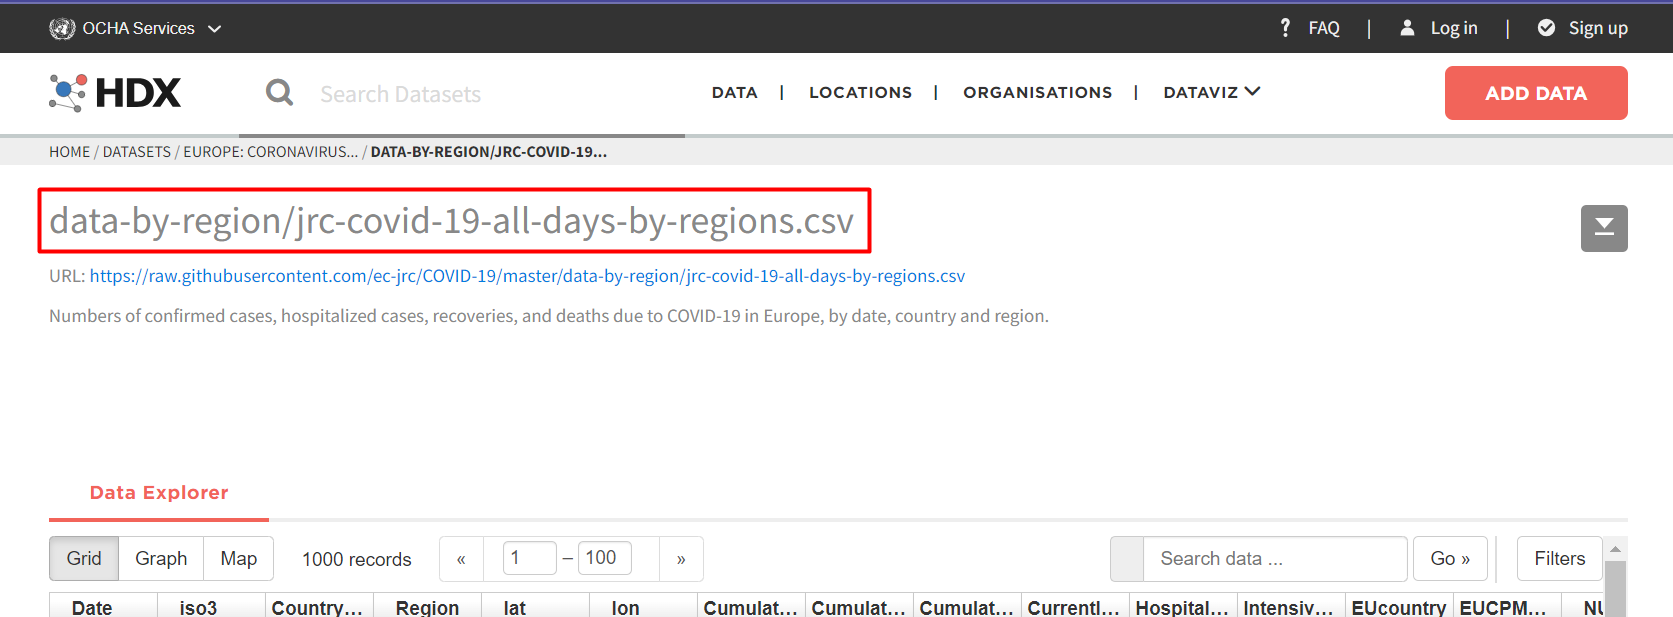

We can access the data using the URL below, and Pandas allows us to directly read data from a URL. 

In [2]:
raw_url = "https://raw.githubusercontent.com/ec-jrc/COVID-19/master/data-by-region/jrc-covid-19-all-days-by-regions.csv"
raw_data = pd.read_csv(raw_url)
df = raw_data.copy()
df.head() #check the first 5 rows in the dataset

,Date,iso3,CountryName,Region,lat,lon,CumulativePositive,CumulativeDeceased,CumulativeRecovered,CurrentlyPositive,Hospitalized,IntensiveCare,EUcountry,EUCPMcountry,NUTS
0,2020-01-03,AIA,Anguilla,NaN,18.225120,-63.072130,0.0,0.0,NaN,0,NaN,NaN,False,False,AI
1,2020-01-03,DMA,Dominica,NaN,15.416749,-61.364130,0.0,0.0,NaN,0,NaN,NaN,False,False,DM
2,2020-01-03,DOM,Dominican Republic,NaN,18.736509,-70.161744,0.0,0.0,NaN,0,NaN,NaN,False,False,DO
3,2020-01-03,FLK,Falkland Islands (Malvinas),NaN,-51.800581,-59.528839,0.0,0.0,NaN,0,NaN,NaN,False,False,FK
4,2020-01-03,IDN,Indonesia,NaN,-2.518722,118.015568,0.0,0.0,NaN,0,NaN,NaN,False,False,ID


In [3]:
# check the data types of all columns
df.dtypes

Date                    object
iso3                    object
CountryName             object
Region                  object
lat                    float64
lon                    float64
CumulativePositive     float64
CumulativeDeceased     float64
CumulativeRecovered    float64
CurrentlyPositive        int64
Hospitalized           float64
IntensiveCare          float64
EUcountry                 bool
EUCPMcountry              bool
NUTS                    object
dtype: object

In [4]:
# If the datatypes are not proper, we may use the following format

#dtypes = {  # bool will return value error because we hav NaN values
#    'Date': object,
#    'iso3': object,
#    'CountryName': object,
#    'Region': object,
#    'lat': float,
#    'lon': float,
#    'CumulativePositive': float,
#    'CumulativeDeceased': float,
#    'CumulativeRecovered': float,
#    'CurrentlyPositive': float,
#    'Hospitalized': float,
#    'IntensiveCare': float,
#    'EUcountry': np.bool,
#    'EUCPMcountry': np.bool,
#    'NUTS': object,
#    }

#df = pd.read_csv(url, skiprows=range(1, 2), dtype=dtypes)
#df.head()

In [5]:
df.tail() #check the last 5 rows in the dataset

,Date,iso3,CountryName,Region,lat,lon,CumulativePositive,CumulativeDeceased,CumulativeRecovered,CurrentlyPositive,Hospitalized,IntensiveCare,EUcountry,EUCPMcountry,NUTS
311124,2023-05-03,CHE,Switzerland,Uri,46.775402,8.627444,15432.0,68.0,0.0,15364,8.0,0.0,False,False,CH062
311125,2023-05-03,CHE,Switzerland,Valais,46.211633,7.611267,150970.0,820.0,0.0,150150,16.0,2.0,False,False,CH012
311126,2023-05-03,CHE,Switzerland,Vaud,46.561760,6.648929,335338.0,1018.0,0.0,334320,414.0,42.0,False,False,CH011
311127,2023-05-03,CHE,Switzerland,Zug,47.161402,8.538864,60668.0,172.0,11004.0,49492,35.0,6.0,False,False,CH066
311128,2023-05-03,CHE,Switzerland,Zurich,47.417407,8.655988,803198.0,1890.0,0.0,801308,56.0,4.0,False,False,CH040


In [6]:
df.shape

(311129, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311129 entries, 0 to 311128
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Date                 311129 non-null  object 
 1   iso3                 311129 non-null  object 
 2   CountryName          311129 non-null  object 
 3   Region               154045 non-null  object 
 4   lat                  290896 non-null  float64
 5   lon                  290896 non-null  float64
 6   CumulativePositive   307729 non-null  float64
 7   CumulativeDeceased   276407 non-null  float64
 8   CumulativeRecovered  100310 non-null  float64
 9   CurrentlyPositive    311129 non-null  int64  
 10  Hospitalized         88784 non-null   float64
 11  IntensiveCare        87864 non-null   float64
 12  EUcountry            311129 non-null  bool   
 13  EUCPMcountry         311129 non-null  bool   
 14  NUTS                 297240 non-null  object 
dtypes: bool(2), float

This provides the total number of rows, non-null counts for each column, and the data types. It's worth noting that some coordinates are missing in the dataset.

In [8]:
df.describe()

,lat,lon,CumulativePositive,CumulativeDeceased,CumulativeRecovered,CurrentlyPositive,Hospitalized,IntensiveCare
count,290896.000000,290896.000000,3.077290e+05,2.764070e+05,1.003100e+05,3.111290e+05,88784.000000,87864.000000
mean,33.430452,9.557539,6.359538e+05,1.078694e+04,2.584895e+05,5.360823e+05,920.324935,121.139227
std,22.905426,45.925015,3.827320e+06,5.600186e+04,2.032610e+06,3.927674e+06,4402.586581,579.116441
min,-51.800581,-143.903496,-6.900000e+01,0.000000e+00,0.000000e+00,-3.820020e+07,0.000000,0.000000
25%,17.363183,-2.333125,3.190000e+03,5.900000e+01,0.000000e+00,1.217000e+03,5.000000,0.000000
50%,42.176820,9.896366,2.794800e+04,4.730000e+02,9.990000e+02,1.502400e+04,37.000000,4.000000
75%,48.193764,20.090775,2.072210e+05,3.447000e+03,3.066400e+04,1.429290e+05,253.000000,30.000000
max,71.702379,178.416339,1.030815e+08,1.121819e+06,3.820020e+07,1.019596e+08,94136.000000,10098.000000


In [9]:
# Let's see the Earliest and Latest date in our dataset
df.Date.max(), df.Date.min()

('2023-05-03', '2020-01-03')

In [10]:
# Let's check the Covid-19 data for Philippines
ph_df = df[df['CountryName'] == 'Philippines']
ph_df.tail()

,Date,iso3,CountryName,Region,lat,lon,CumulativePositive,CumulativeDeceased,CumulativeRecovered,CurrentlyPositive,Hospitalized,IntensiveCare,EUcountry,EUCPMcountry,NUTS
309199,2023-04-05,PHL,Philippines,NaN,12.881958,121.766541,4081818.0,66390.0,NaN,4015428,NaN,NaN,False,False,PH
309398,2023-04-06,PHL,Philippines,NaN,12.881958,121.766541,4081818.0,66390.0,NaN,4015428,NaN,NaN,False,False,PH
309800,2023-04-12,PHL,Philippines,NaN,12.881958,121.766541,4083678.0,66420.0,NaN,4017258,NaN,NaN,False,False,PH
310286,2023-04-19,PHL,Philippines,NaN,12.881958,121.766541,4085969.0,66439.0,NaN,4019530,NaN,NaN,False,False,PH
310773,2023-04-26,PHL,Philippines,NaN,12.881958,121.766541,4087964.0,66444.0,NaN,4021520,NaN,NaN,False,False,PH


In [11]:
ph_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 896 entries, 373 to 310773
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 896 non-null    object 
 1   iso3                 896 non-null    object 
 2   CountryName          896 non-null    object 
 3   Region               0 non-null      object 
 4   lat                  896 non-null    float64
 5   lon                  896 non-null    float64
 6   CumulativePositive   896 non-null    float64
 7   CumulativeDeceased   896 non-null    float64
 8   CumulativeRecovered  0 non-null      float64
 9   CurrentlyPositive    896 non-null    int64  
 10  Hospitalized         0 non-null      float64
 11  IntensiveCare        0 non-null      float64
 12  EUcountry            896 non-null    bool   
 13  EUCPMcountry         896 non-null    bool   
 14  NUTS                 896 non-null    object 
dtypes: bool(2), float64(7), int64(1), o

In [12]:
ph_df.shape

(896, 15)

In [13]:
# Let's see the latest and earliest date in our PH dataset
ph_df.Date.max(), ph_df.Date.min()

('2023-04-26', '2020-01-31')

We have successfully read the data using Pandas and explored some of its characteristics. Next, we will convert the Pandas DataFrame into a Geodataframe, enabling us to query the data by location.